In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import the mdates module
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [50]:
# Reading the dataset into the program
data = pd.read_csv(r'C:\Users\thoma\python projects\Data Analysis\Other Projects\Ectopus Energy Yearly Dataset.csv', encoding='UTF-8',sep=',')

# Converting the dataset to a pandas DataFrame for usage in the program
data_df = pd.DataFrame(data)

# Converting the 'date' column into a DateTime variable
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%d/%m/%Y')

# Replacing columns with 'NaN' values with 0.00 to reflect no data being present.
data_df = data_df.fillna(0.00)

In [51]:
# Getting the index of the maximum value in 'Elec (kWh)' column
highest_energy = data_df['Elec (kWh)'].idxmax()

# Getting the index of the maximum value in 'Gas (kWh)' column
highest_gas = data_df['Gas (kWh)'].idxmax()


# Retrieving the entire row using that index
highest_energy_row = data_df.loc[highest_energy]

highest_gas_row = data_df.loc[highest_gas]

# Printing the row
print("Date with most electricity used:")
print(highest_energy_row)
print()
print("Date with most gas used:")
print(highest_gas_row)

Date with most electricity used:
Date          2023-02-11 00:00:00
Elec (kWh)                  20.33
Elec Price                   6.39
Gas (kWh)                     0.0
Gas Price                     0.0
Name: 24, dtype: object

Date with most gas used:
Date          2023-03-09 00:00:00
Elec (kWh)                   9.81
Elec Price                   3.08
Gas (kWh)                   36.09
Gas Price                    3.52
Name: 50, dtype: object


In [52]:
daily_cost_totals = (data_df ["Elec Price"] + data_df["Gas Price"])

# Add the resulting Series as a new column to the DataFrame
data_df['Daily Cost Totals'] = daily_cost_totals

highest_dc = data_df['Daily Cost Totals'].idxmax()

highest_dc_row = data_df.loc[highest_dc]

print("Date with the highest daily cost:")
print(highest_dc_row)

Date with the highest daily cost:
Date                 2023-03-08 00:00:00
Elec (kWh)                         15.65
Elec Price                          4.92
Gas (kWh)                          30.19
Gas Price                           2.95
Daily Cost Totals                   7.87
Name: 49, dtype: object


In [53]:
# Calculating Means for each variable:

elec_usage_mean = data_df['Elec (kWh)'].mean().__round__(2)
elec_price_mean = data_df['Elec Price'].mean().__round__(2)
gas_usage_mean = data_df['Gas (kWh)'].mean().__round__(2)
gas_price_mean = data_df['Gas Price'].mean().__round__(2)
daily_price_mean = data_df['Daily Cost Totals'].mean().__round__(2)

print("Means:")
print()
print("Electricity Usage: ")
print(elec_usage_mean)
print()
print("Electricity Price: ")
print(elec_price_mean)
print()
print("Gas Usage: ")
print(gas_usage_mean)
print()
print("Gas Price: ")
print(gas_price_mean)
print()
print("Average Daily Cost: ")
print(daily_price_mean)

Means:

Electricity Usage: 
5.73

Electricity Price: 
1.72

Gas Usage: 
6.63

Gas Price: 
0.58

Average Daily Cost: 
2.3


In [54]:
# Calculating average weekly costs:

# Weekly:

weekly_elec_usage = (elec_usage_mean * 7).__round__(2)
weekly_elec_price = (elec_price_mean * 7).__round__(2)
weekly_gas_usage = (gas_usage_mean * 7).__round__(2)
weekly_gas_price = (gas_price_mean * 7).__round__(2)
weekly_cost = (daily_price_mean * 7).__round__(2)

# Printing Results:
print("Weekly Costs:")
print()
print("Electricity Weekly Usage: ")
print(weekly_elec_usage , "(kWh)")
print()
print("Electricity Weekly Price: ")
print("£ ",weekly_elec_price)
print()
print("Gas Weekly Usage: ")
print(weekly_gas_usage , "(kWh)")
print()
print("Gas Weekly Price: ")
print("£ ", weekly_gas_price)
print()
print("Average Weekly Cost: ")
print("£" , weekly_cost)

# Drop rows where 'Date' column has non-datetime entries
data_df_cleaned = data_df[data_df['Date'].apply(lambda x: isinstance(x, pd.Timestamp))]


Weekly Costs:

Electricity Weekly Usage: 
40.11 (kWh)

Electricity Weekly Price: 
£  12.04

Gas Weekly Usage: 
46.41 (kWh)

Gas Weekly Price: 
£  4.06

Average Weekly Cost: 
£ 16.1


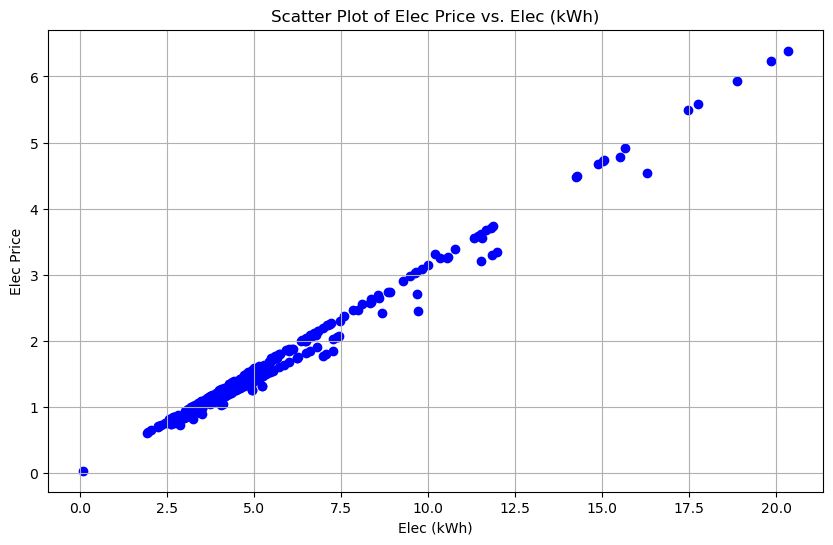

In [55]:
# Scatter plot for visualizing the relationship
plt.figure(figsize=(10,6))
plt.scatter(data['Elec (kWh)'], data['Elec Price'], color='blue', marker='o')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.grid(True)
plt.show()

In [56]:
# Reloading and preprocessing the dataset
dataset = pd.read_csv(r'C:\Users\thoma\python projects\Data Analysis\Other Projects\Ectopus Energy Yearly Dataset.csv')
dataset.fillna(method='ffill', inplace=True)
dataset.fillna(method='bfill', inplace=True)

# Extracting the independent and dependent variables
X = dataset[['Elec (kWh)']]
y = dataset['Elec Price']

# Refitting the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Calculating the mean of 'Elec (kWh)' and making the prediction
mean_elec_kwh = dataset['Elec (kWh)'].mean()
predicted_price_for_mean = regressor.predict([[mean_elec_kwh]])

mean_elec_kwh, predicted_price_for_mean[0]


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(5.732472324723247, 1.71690036900369)

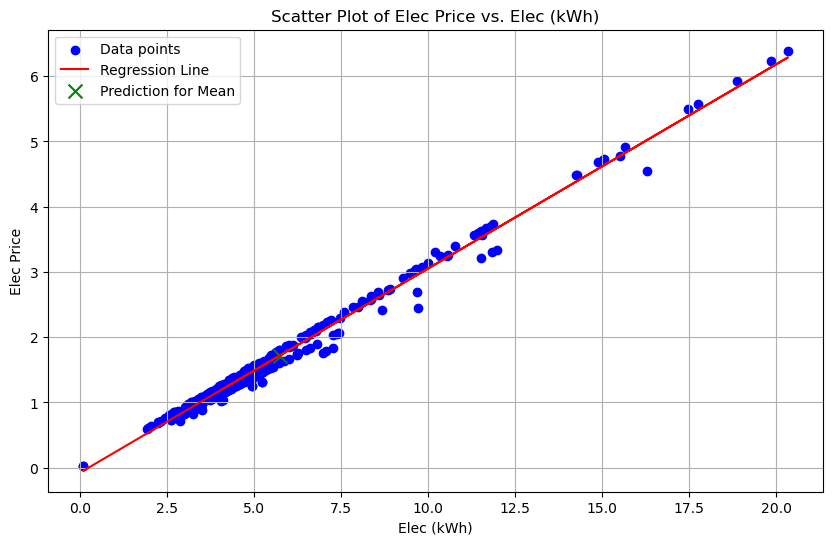

In [57]:
# Generating predicted y-values for the entire dataset using the regression model
y_pred = regressor.predict(X)

# Scatter plot with regression line and mean prediction
plt.figure(figsize=(10,6))
plt.scatter(dataset['Elec (kWh)'], dataset['Elec Price'], color='blue', marker='o', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(mean_elec_kwh, predicted_price_for_mean, color='green', marker='x', s=100, label='Prediction for Mean')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.legend()
plt.grid(True)
plt.show()


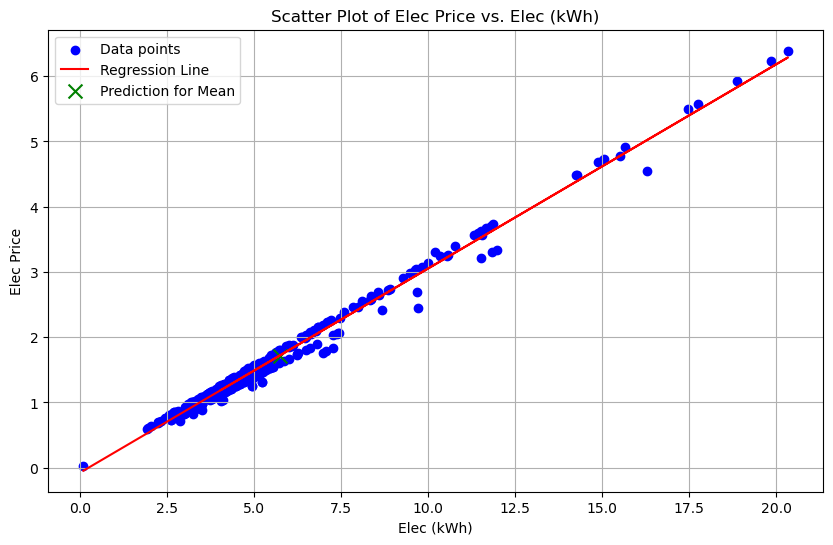

In [58]:
# Scatter plot with regression line and mean prediction
plt.figure(figsize=(10,6))
plt.scatter(data['Elec (kWh)'], data['Elec Price'], color='blue', marker='o', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(mean_elec_kwh, predicted_price_for_mean, color='green', marker='x', s=100, label='Prediction for Mean')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.legend()
plt.grid(True)
plt.show()

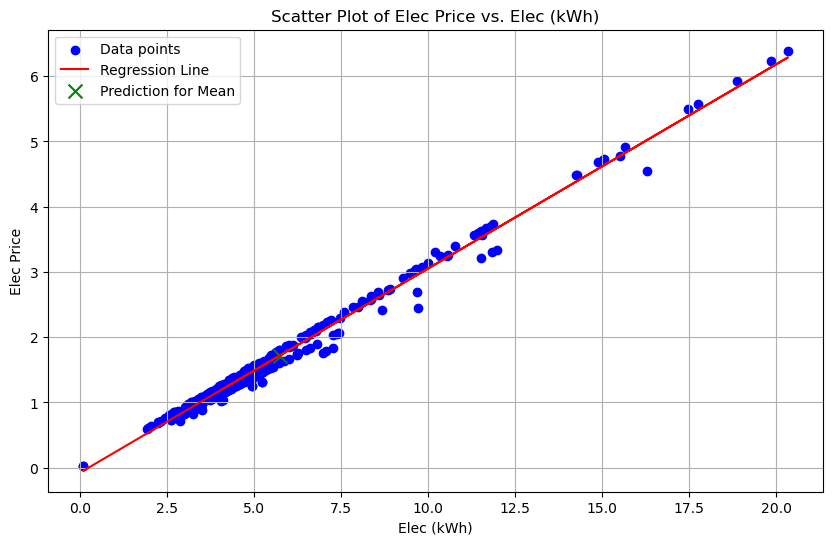

In [59]:
# Generating predicted y-values for the entire dataset using the regression model
y_pred = regressor.predict(X)

# Scatter plot with regression line and mean prediction
plt.figure(figsize=(10,6))
plt.scatter(dataset['Elec (kWh)'], dataset['Elec Price'], color='blue', marker='o', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(mean_elec_kwh, predicted_price_for_mean, color='green', marker='x', s=100, label='Prediction for Mean')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Extracting the independent and dependent variables
gas_predict = dataset[['Gas (kWh)']]
elec_predict = dataset['Elec (kWh)']

# Refitting the linear regression model
regressor2 = LinearRegression()
regressor2.fit(gas_predict, elec_predict)

gas_elec_predict = regressor2.predict(gas_predict)

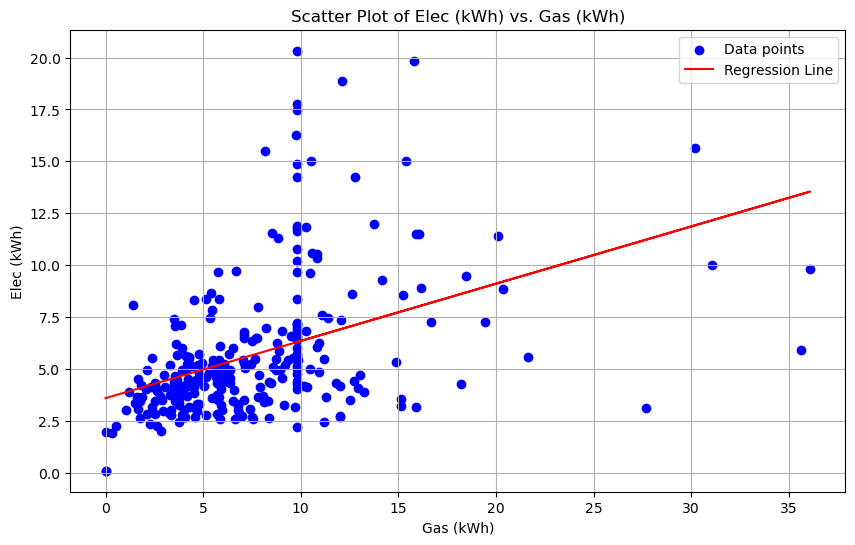

In [61]:
# Scatter plot with regression line
plt.figure(figsize=(10,6))
plt.scatter(dataset['Gas (kWh)'], dataset['Elec (kWh)'], color='blue', marker='o', label='Data points')
plt.plot(gas_predict, gas_elec_predict, color='red', label='Regression Line')

plt.title('Scatter Plot of Elec (kWh) vs. Gas (kWh)')
plt.xlabel('Gas (kWh)')
plt.ylabel('Elec (kWh)')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Filtering the dataset
filtered_dataset = dataset[(dataset['Gas (kWh)'] < 10) & (dataset['Elec (kWh)'] < 10)]

# Extracting the independent and dependent variables from the filtered dataset
gas_predict_filtered = filtered_dataset[['Gas (kWh)']]
elec_predict_filtered = filtered_dataset['Elec (kWh)']

# Refitting the linear regression model using the filtered data
regressor2_filtered = LinearRegression()
regressor2_filtered.fit(gas_predict_filtered, elec_predict_filtered)

# Making predictions using the filtered data
gas_elec_predict_filtered = regressor2_filtered.predict(gas_predict_filtered)

len(filtered_dataset), len(gas_elec_predict_filtered)  # Returning the lengths to verify the filtering and prediction process


(202, 202)

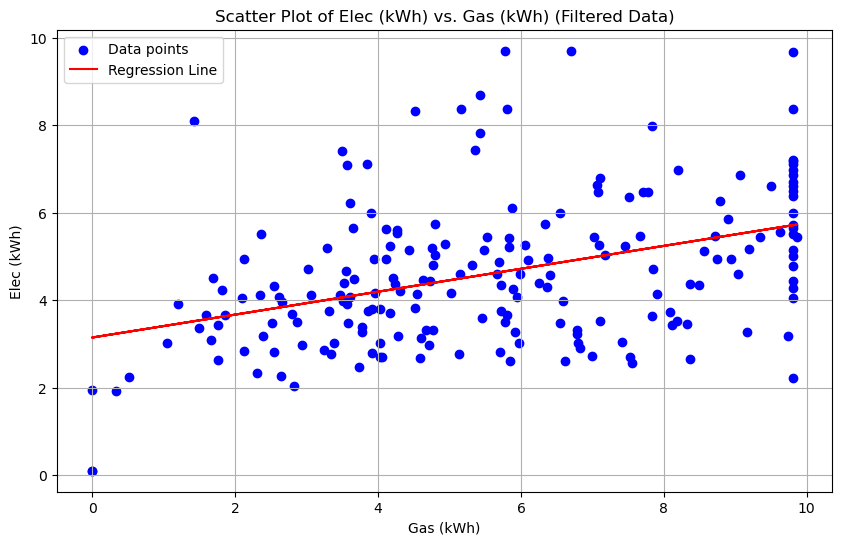

In [63]:
# Scatter plot with regression line for the filtered data
plt.figure(figsize=(10,6))
plt.scatter(filtered_dataset['Gas (kWh)'], filtered_dataset['Elec (kWh)'], color='blue', marker='o', label='Data points')
plt.plot(gas_predict_filtered, gas_elec_predict_filtered, color='red', label='Regression Line')

plt.title('Scatter Plot of Elec (kWh) vs. Gas (kWh) (Filtered Data)')
plt.xlabel('Gas (kWh)')
plt.ylabel('Elec (kWh)')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the filtered data into training and test sets (default split: 75% train, 25% test)
gas_train, gas_test, elec_train, elec_test = train_test_split(gas_predict_filtered, elec_predict_filtered, test_size=0.25, random_state=42)

# Training the model using the training set
regressor2_test = LinearRegression()
regressor2_test.fit(gas_train, elec_train)

# Making predictions on the test set
elec_predictions = regressor2_test.predict(gas_test)

# Calculating evaluation metrics
mae = mean_absolute_error(elec_test, elec_predictions)
mse = mean_squared_error(elec_test, elec_predictions)
r2 = r2_score(elec_test, elec_predictions)

mae, mse, r2


(1.1037092779853004, 2.2110555758015655, 0.27245571804888613)

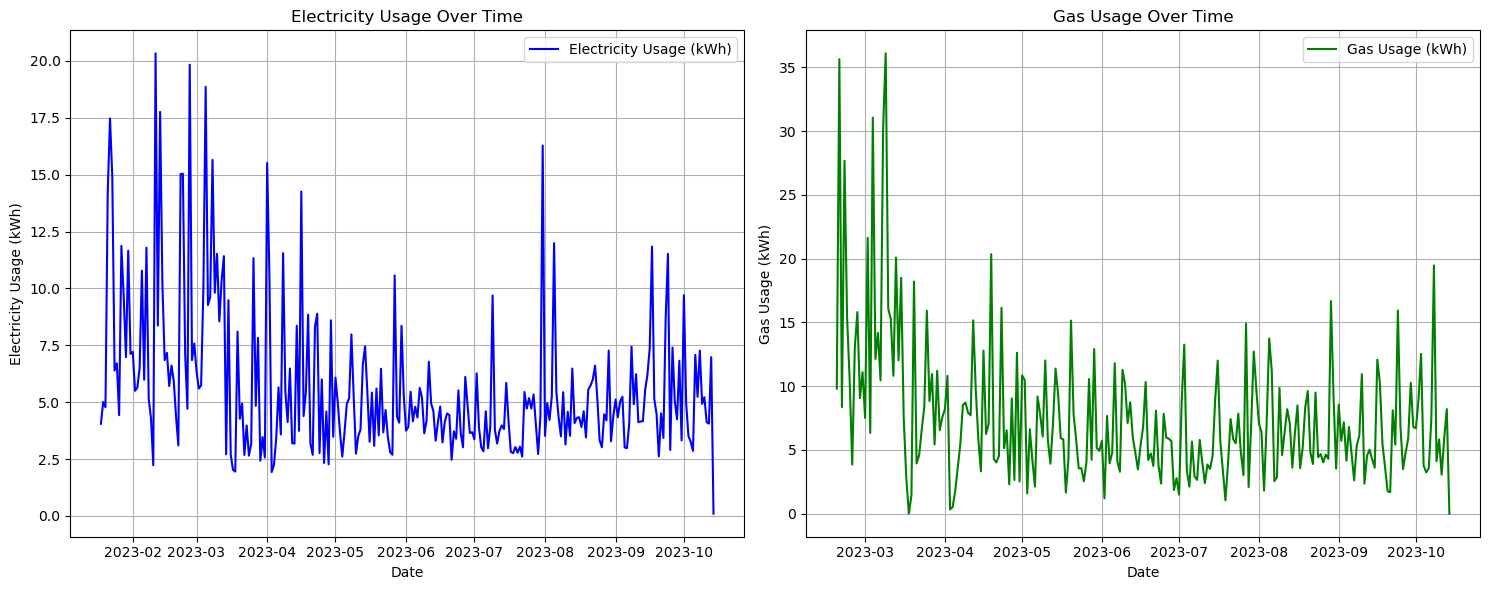

In [65]:
# Converting the 'Date' column into a DateTime variable and setting it as index
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

# Visualizing the electricity and gas usage over time
plt.figure(figsize=(15, 6))

# Plot for Electricity Usage
plt.subplot(1, 2, 1)
plt.plot(data['Elec (kWh)'], label='Electricity Usage (kWh)', color='blue')
plt.title('Electricity Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.grid(True)

# Plot for Gas Usage
plt.subplot(1, 2, 2)
plt.plot(data['Gas (kWh)'], label='Gas Usage (kWh)', color='green')
plt.title('Gas Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Gas Usage (kWh)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


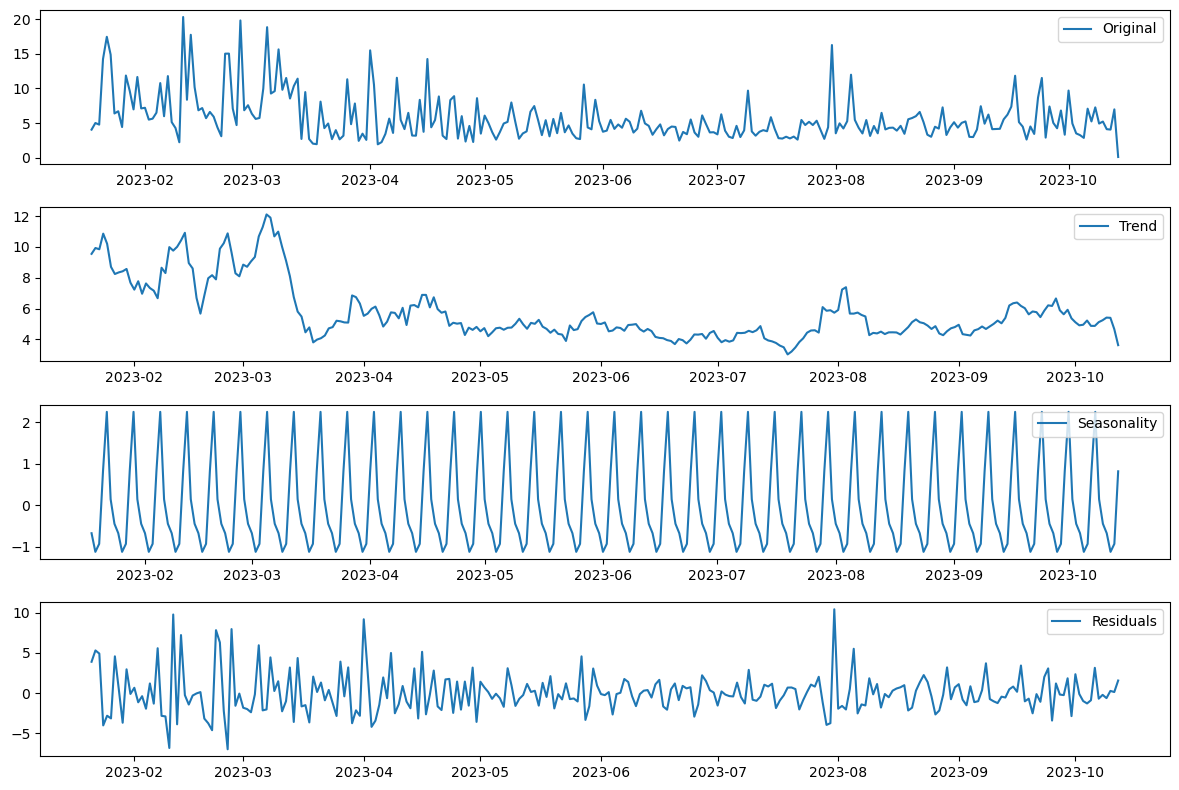

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill missing values in the 'Elec (kWh)' column
data['Elec (kWh)'] = data['Elec (kWh)'].fillna(0)

# Decomposing the electricity usage time series
decomposition_elec = seasonal_decompose(data['Elec (kWh)'], model='additive', period=7)  # Weekly seasonality

# Plotting the decomposed components of the electricity usage time series
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition_elec.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition_elec.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition_elec.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition_elec.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Observed: This is the original data, showing the actual electricity usage over time.

Trend: This component shows the underlying trend in the data. It seems that there might be some fluctuations over time, but no clear long-term increasing or decreasing trend is evident.

Seasonality: The seasonality component, extracted on a weekly basis, suggests some regular patterns. However, these patterns don't seem to be very pronounced or consistent.

Residuals: These are the irregular components that cannot be attributed to trend or seasonality. The residuals show quite a bit of variability, indicating that factors other than simple trend or seasonality are influencing electricity usage.


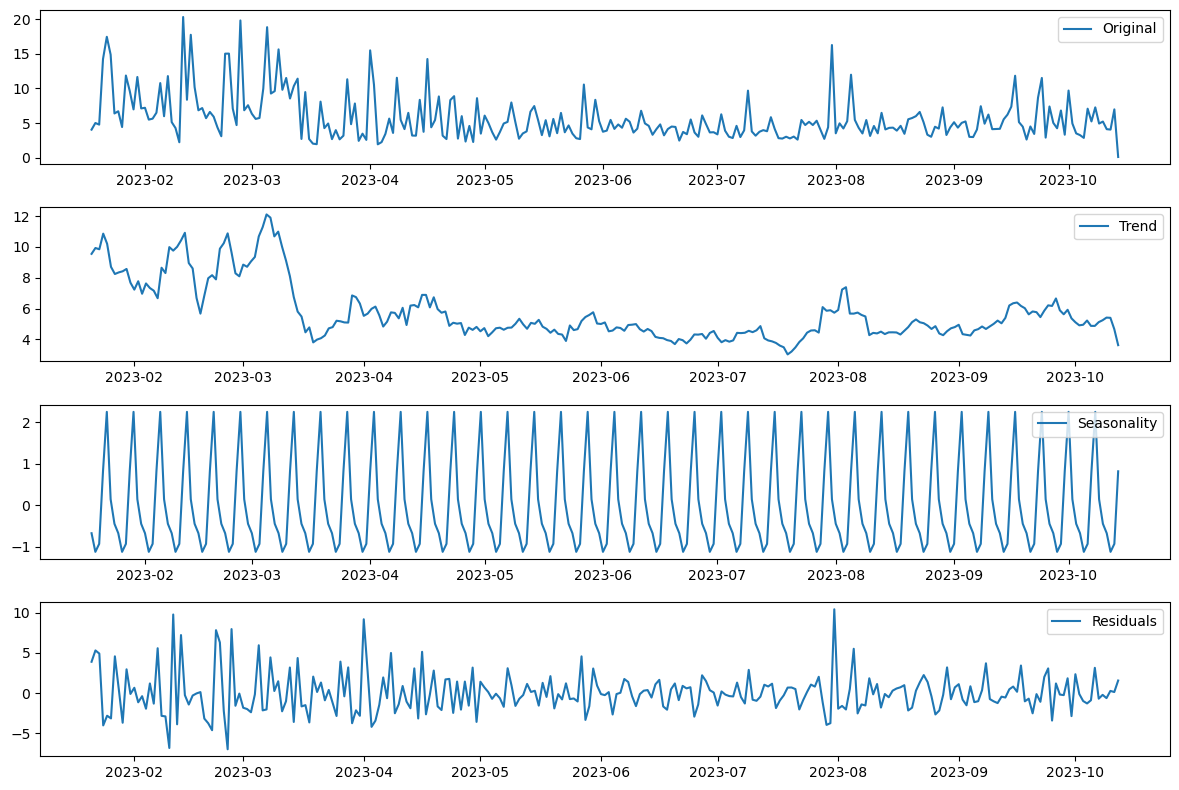

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the electricity usage time series
decomposition_elec = seasonal_decompose(data['Elec (kWh)'], model='additive', period=7)  # Weekly seasonality

# Plotting the decomposed components of the electricity usage time series
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition_elec.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition_elec.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition_elec.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition_elec.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


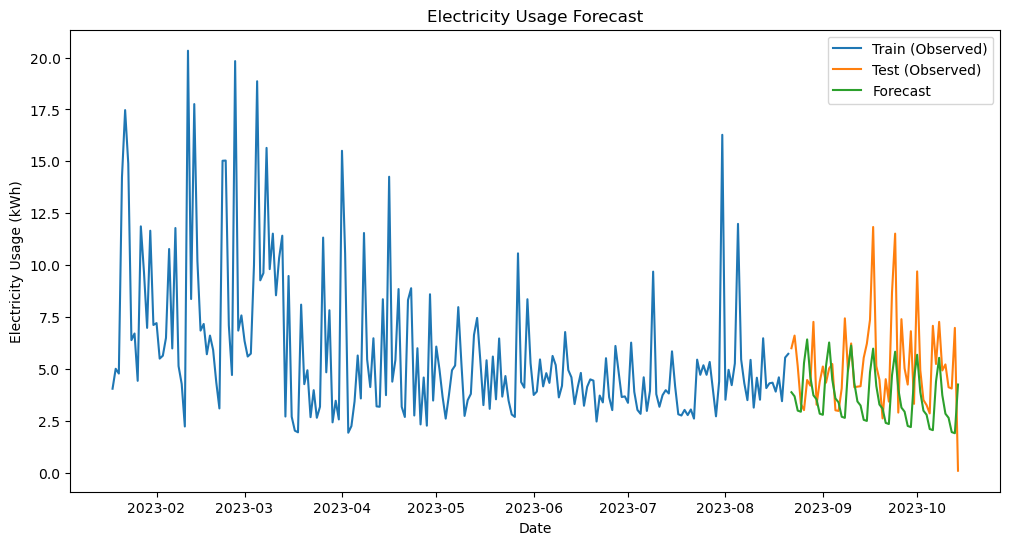

(6.912879404228213, 2.629235517071115)

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train_elec, test_elec = data['Elec (kWh)'][:train_size], data['Elec (kWh)'][train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_elec, trend="add", seasonal="add", seasonal_periods=7)
fitted_model = model.fit()

# Forecasting on the test data
elec_forecast = fitted_model.forecast(test_size)

# Calculating Mean Squared Error (MSE) for the forecasts
mse_elec = mean_squared_error(test_elec, elec_forecast)
mse_elec_sqrt = mse_elec ** 0.5

# Plotting the observed vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_elec.index, train_elec, label='Train (Observed)')
plt.plot(test_elec.index, test_elec, label='Test (Observed)')
plt.plot(test_elec.index, elec_forecast, label='Forecast')
plt.title('Electricity Usage Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()

mse_elec, mse_elec_sqrt


In [69]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Augmented Dickey-Fuller test for stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Performing the stationarity test on the electricity usage data
stationarity_test_results = test_stationarity(data['Elec (kWh)'])
stationarity_test_results


# Differencing the series to make it stationary
data_diff = data['Elec (kWh)'].diff().dropna()

# Performing the stationarity test again on the differenced data
stationarity_test_results_diff = test_stationarity(data_diff)
stationarity_test_results_diff


Test Statistic                -6.378703e+00
p-value                        2.250132e-08
#Lags Used                     1.400000e+01
Number of Observations Used    2.550000e+02
Critical Value (1%)           -3.456257e+00
Critical Value (5%)           -2.872942e+00
Critical Value (10%)          -2.572846e+00
dtype: float64

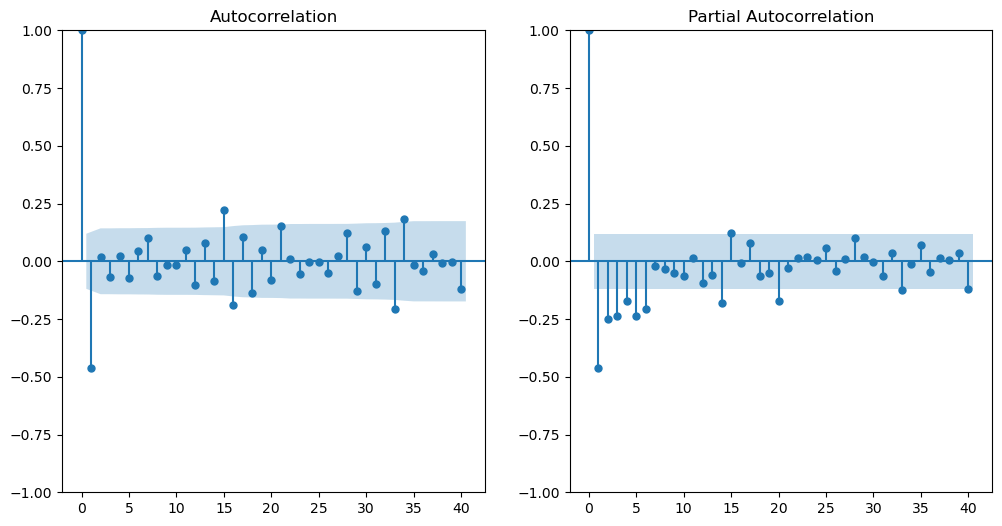

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12,6))

# ACF plot
plt.subplot(121)
plot_acf(data_diff, ax=plt.gca(), lags=40)

# PACF plot
plt.subplot(122)
plot_pacf(data_diff, ax=plt.gca(), lags=40)

plt.show()


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


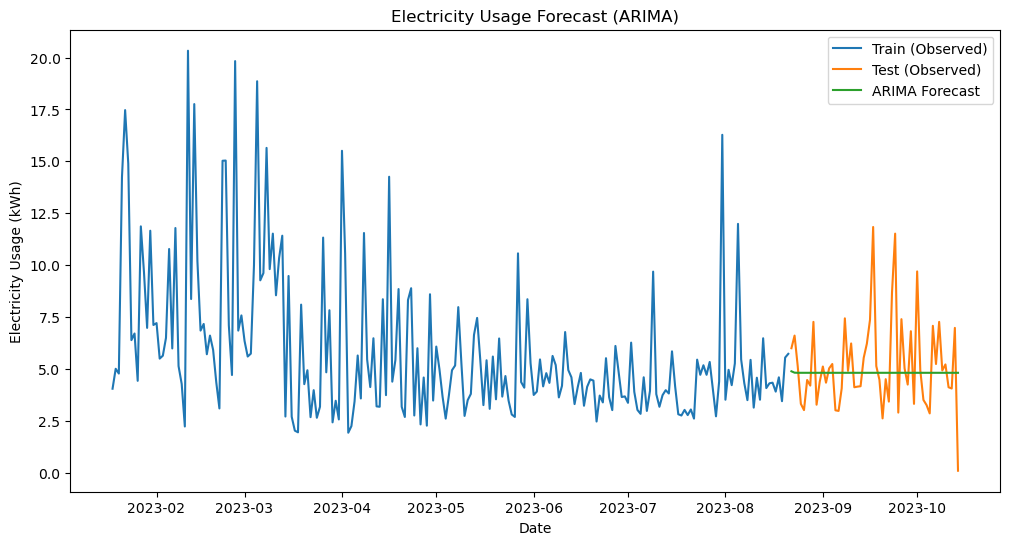

(4.977838172743096, 2.2311069388855156)

In [71]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Splitting the data again into training and testing sets (original, non-differenced data)
train_elec_arima, test_elec_arima = data['Elec (kWh)'][:train_size], data['Elec (kWh)'][train_size:]

# Fitting the ARIMA model
model_arima = ARIMA(train_elec_arima, order=(1, 1, 1))
fitted_model_arima = model_arima.fit()

# Forecasting on the test data
elec_forecast_arima = fitted_model_arima.forecast(steps=test_size)

# Calculating Mean Squared Error (MSE) for the ARIMA forecasts
mse_elec_arima = mean_squared_error(test_elec_arima, elec_forecast_arima)
mse_elec_arima_sqrt = mse_elec_arima ** 0.5

# Plotting the observed vs forecasted values using ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(train_elec_arima.index, train_elec_arima, label='Train (Observed)')
plt.plot(test_elec_arima.index, test_elec_arima, label='Test (Observed)')
plt.plot(test_elec_arima.index, elec_forecast_arima, label='ARIMA Forecast')
plt.title('Electricity Usage Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()

mse_elec_arima, mse_elec_arima_sqrt


C:\Users\thoma\AppData\Local\Temp\ipykernel_18500\156863252.py:5: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not data.index.is_monotonic or data.index.hasnans:


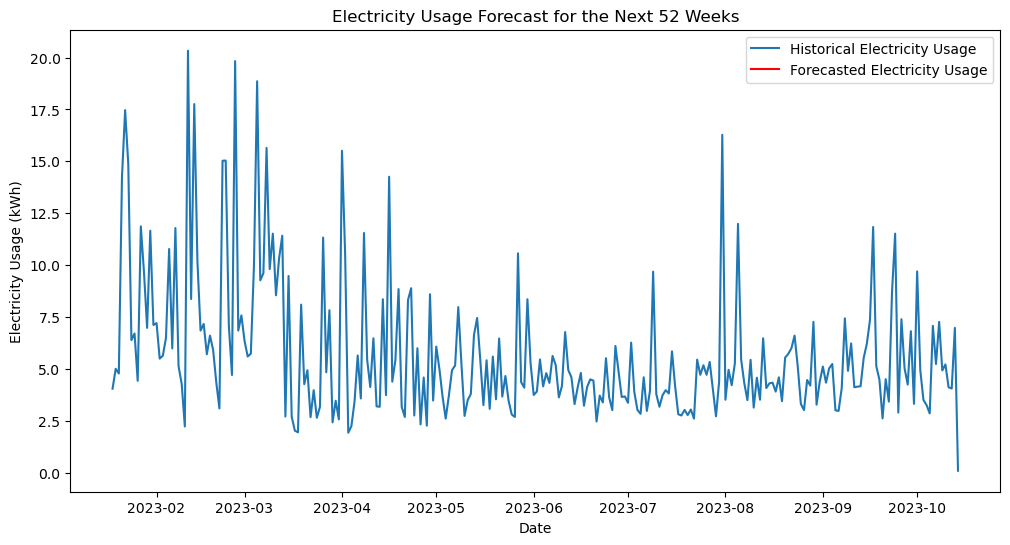

2023-10-15   NaN
2023-10-16   NaN
2023-10-17   NaN
2023-10-18   NaN
2023-10-19   NaN
Freq: D, Name: predicted_mean, dtype: float64

In [72]:
# Ensuring the dataset's date index is properly formatted for forecasting
data.sort_index(inplace=True)  # Sorting the data by date

# Checking for any missing or irregular dates
if not data.index.is_monotonic or data.index.hasnans:
    data = data[~data.index.duplicated()]  # Removing any duplicate dates
    data = data.asfreq('D', fill_value=0)  # Setting frequency to daily, filling any missing dates with 0

# Now, let's retry forecasting electricity usage 52 weeks into the future
future_dates_corrected = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_forecast_period, freq='D')
future_forecast_series_corrected = pd.Series(future_forecast, index=future_dates_corrected)

# Plotting the historical data along with the corrected forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Elec (kWh)'], label='Historical Electricity Usage')
plt.plot(future_forecast_series_corrected, label='Forecasted Electricity Usage', color='red')
plt.title('Electricity Usage Forecast for the Next 52 Weeks')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()

future_forecast_series_corrected.head()  # Display the first few forecasted values


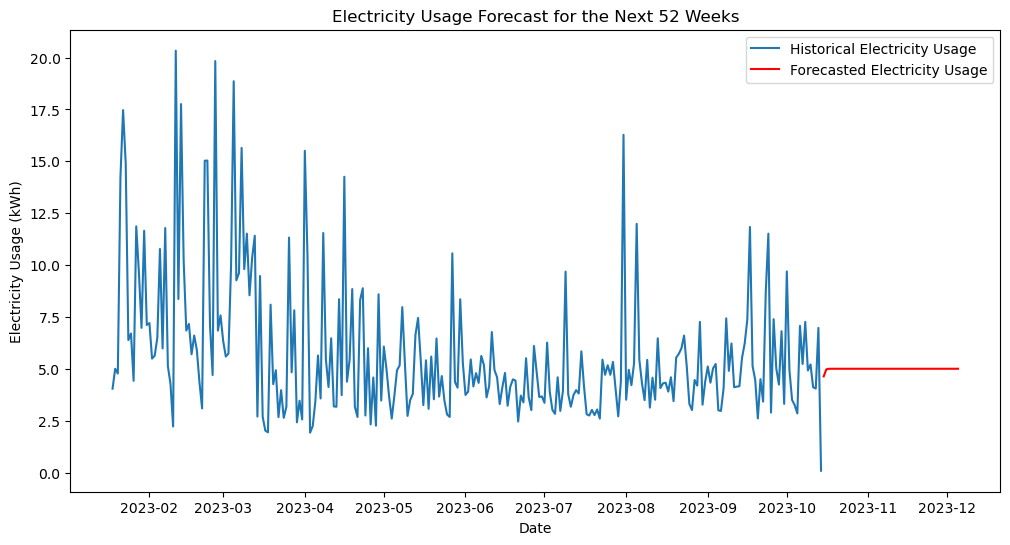

2023-10-15    4.643485
2023-10-16    4.984181
2023-10-17    5.009729
2023-10-18    5.011644
2023-10-19    5.011788
Freq: D, Name: predicted_mean, dtype: float64

In [73]:
# Re-fitting the ARIMA model to the entire dataset and generating a new forecast
model_arima_full_corrected = ARIMA(data['Elec (kWh)'], order=(1, 1, 1))
fitted_model_arima_full_corrected = model_arima_full_corrected.fit()

# Generating a new forecast for the future period
future_forecast_corrected = fitted_model_arima_full_corrected.forecast(steps=future_forecast_period)

# Creating a new time series for the corrected forecasted period
future_forecast_series_corrected = pd.Series(future_forecast_corrected, index=future_dates_corrected)

# Re-plotting the historical data along with the corrected forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Elec (kWh)'], label='Historical Electricity Usage')
plt.plot(future_forecast_series_corrected, label='Forecasted Electricity Usage', color='red')
plt.title('Electricity Usage Forecast for the Next 52 Weeks')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()

future_forecast_series_corrected.head()  # Display the first few forecasted values


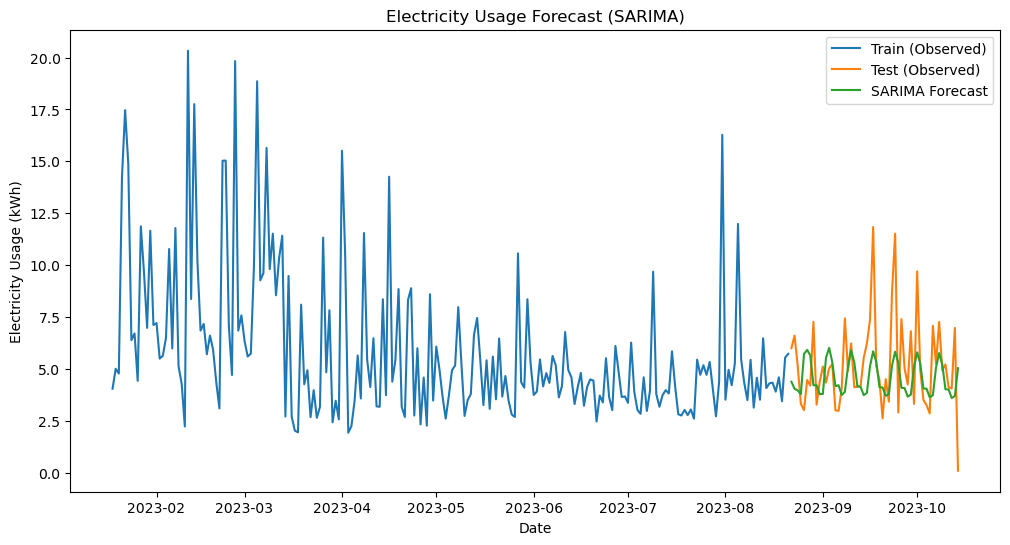

(4.619915218346647, 2.1493988039325433)

In [74]:
# Splitting the data into training and testing sets
train_size_sarima = int(len(data) * 0.8)
test_size_sarima = len(data) - train_size_sarima
train_elec_sarima, test_elec_sarima = data['Elec (kWh)'][:train_size_sarima], data['Elec (kWh)'][train_size_sarima:]

# Fitting the SARIMA model
model_sarima = SARIMAX(train_elec_sarima, order=(p, d, q), seasonal_order=(P, D, Q, S))
fitted_model_sarima = model_sarima.fit()

# Forecasting on the test data
elec_forecast_sarima = fitted_model_sarima.forecast(steps=test_size_sarima)

# Calculating Mean Squared Error (MSE) for the SARIMA forecasts
mse_elec_sarima = mean_squared_error(test_elec_sarima, elec_forecast_sarima)
mse_elec_sarima_sqrt = mse_elec_sarima ** 0.5

# Plotting the observed vs forecasted values using SARIMA model
plt.figure(figsize=(12, 6))
plt.plot(train_elec_sarima.index, train_elec_sarima, label='Train (Observed)')
plt.plot(test_elec_sarima.index, test_elec_sarima, label='Test (Observed)')
plt.plot(test_elec_sarima.index, elec_forecast_sarima, label='SARIMA Forecast')
plt.title('Electricity Usage Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()

mse_elec_sarima, mse_elec_sarima_sqrt

In [75]:
# Manual tuning of the SARIMA model parameters
# Experimenting with different combinations of parameters based on domain knowledge and previous observations

# Trying a few different combinations of parameters
parameter_combinations = [(1, 1, 1, 1, 1, 1, 7),  # The initial model we tried
                          (0, 1, 1, 0, 1, 1, 7),  # Reducing autoregressive components
                          (1, 1, 2, 1, 1, 2, 7),  # Increasing MA components
                          (2, 1, 1, 2, 1, 1, 7)]  # Increasing AR components

# Dictionary to store MSE for each combination
mse_results = {}

for params in parameter_combinations:
    p, d, q, P, D, Q, S = params
    model_sarima_tuned = SARIMAX(train_elec_sarima, order=(p, d, q), seasonal_order=(P, D, Q, S))
    fitted_model_sarima_tuned = model_sarima_tuned.fit(disp=False)
    elec_forecast_sarima_tuned = fitted_model_sarima_tuned.forecast(steps=test_size_sarima)
    mse_sarima_tuned = mean_squared_error(test_elec_sarima, elec_forecast_sarima_tuned)
    mse_results[params] = mse_sarima_tuned

# Identifying the parameter combination with the lowest MSE
best_params = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_params]

best_params, best_mse


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


((2, 1, 1, 2, 1, 1, 7), 4.619915218346647)

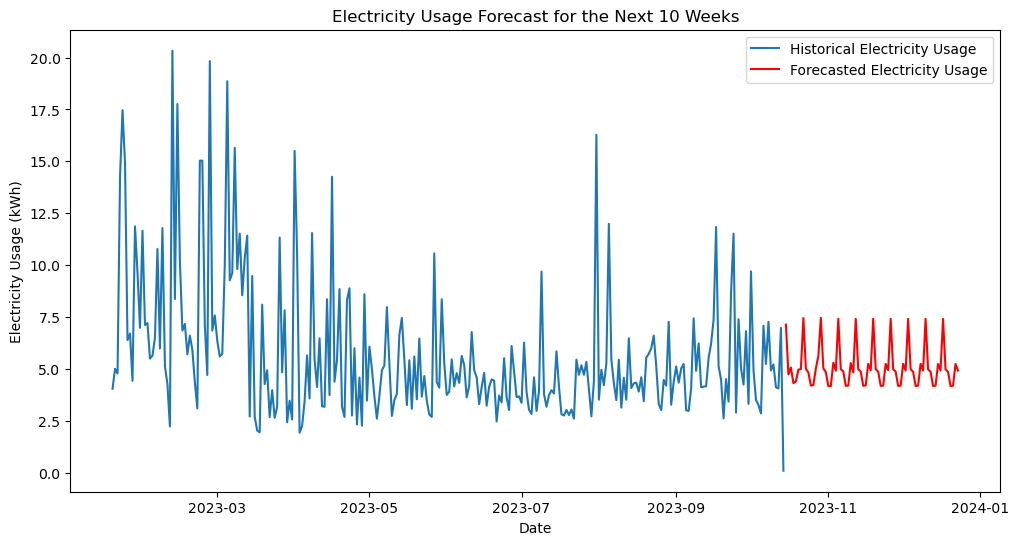

2023-10-15    7.136222
2023-10-16    4.739256
2023-10-17    5.070509
2023-10-18    4.317099
2023-10-19    4.406306
Freq: D, Name: predicted_mean, dtype: float64

In [76]:
# Forecasting electricity usage 10 weeks into the future using the SARIMA(2,1,1)(2,1,1)[7] model
future_forecast_period_short = 10 * 7  # 10 weeks

# Fitting the SARIMA model with the identified parameters to the entire dataset
model_sarima_best = SARIMAX(data['Elec (kWh)'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 7))
fitted_model_sarima_best = model_sarima_best.fit()

# Generating the forecast for the next 10 weeks
future_forecast_short_term = fitted_model_sarima_best.forecast(steps=future_forecast_period_short)

# Creating a time series for the forecasted period
future_dates_short_term = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_forecast_period_short, freq='D')
future_forecast_series_short_term = pd.Series(future_forecast_short_term, index=future_dates_short_term)

# Plotting the historical data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Elec (kWh)'], label='Historical Electricity Usage')
plt.plot(future_forecast_series_short_term, label='Forecasted Electricity Usage', color='red')
plt.title('Electricity Usage Forecast for the Next 10 Weeks')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()

future_forecast_series_short_term.head()  # Display the first few forecasted values


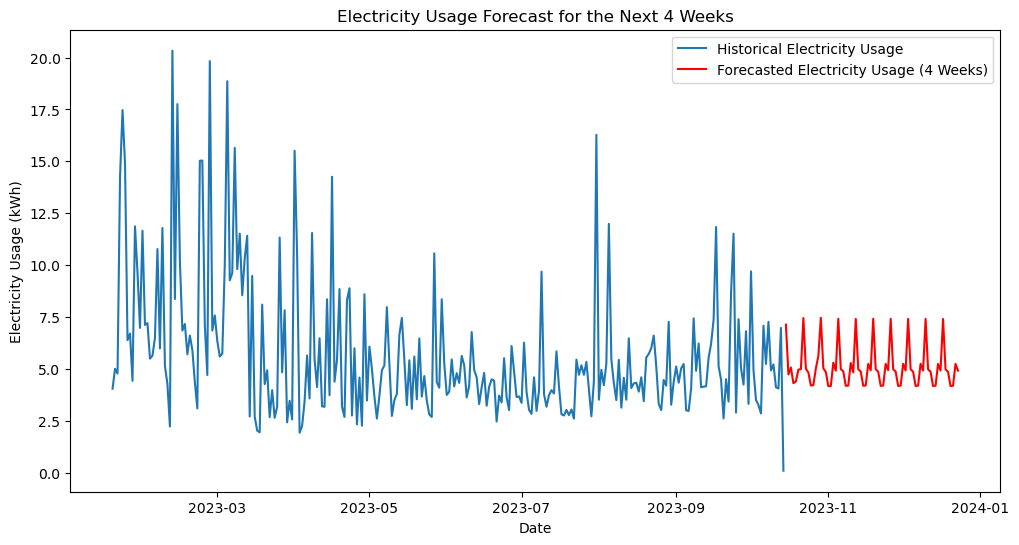

In [77]:
# Forecasting electricity usage 4 weeks into the future using the SARIMA(2,1,1)(2,1,1)[7] model
future_forecast_period_4_weeks = 10 * 7  # 4 weeks

# Fitting the SARIMA model with the identified parameters to the entire dataset
model_sarima_4_weeks = SARIMAX(data['Elec (kWh)'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 7))
fitted_model_sarima_4_weeks = model_sarima_4_weeks.fit()

# Generating the forecast for the next 4 weeks
future_forecast_4_weeks = fitted_model_sarima_4_weeks.forecast(steps=future_forecast_period_4_weeks)

# Creating a time series for the forecasted period
future_dates_4_weeks = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_forecast_period_4_weeks, freq='D')
future_forecast_series_4_weeks = pd.Series(future_forecast_4_weeks, index=future_dates_4_weeks)

# Plotting the historical data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Elec (kWh)'], label='Historical Electricity Usage')
plt.plot(future_forecast_series_4_weeks, label='Forecasted Electricity Usage (4 Weeks)', color='red')
plt.title('Electricity Usage Forecast for the Next 4 Weeks')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()



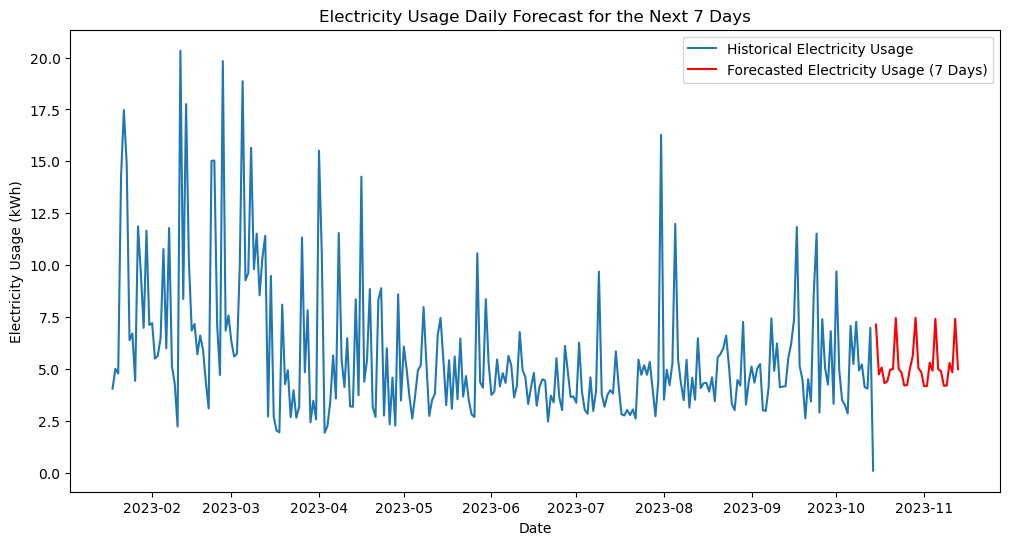

2023-10-15    7.136222
2023-10-16    4.739256
2023-10-17    5.070509
2023-10-18    4.317099
2023-10-19    4.406306
Freq: D, Name: predicted_mean, dtype: float64

In [78]:
# Forecasting electricity usage for the next 7 days using the SARIMA(2,1,1)(2,1,1)[7] model
future_forecast_period_7_days = 30  # 7 days

# Fitting the SARIMA model with the identified parameters to the entire dataset
model_sarima_7_days = SARIMAX(data['Elec (kWh)'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 7))
fitted_model_sarima_7_days = model_sarima_7_days.fit()

# Generating the forecast for the next 7 days
future_forecast_7_days = fitted_model_sarima_7_days.forecast(steps=future_forecast_period_7_days)

# Creating a time series for the forecasted period
future_dates_7_days = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_forecast_period_7_days, freq='D')
future_forecast_series_7_days = pd.Series(future_forecast_7_days, index=future_dates_7_days)

# Plotting the historical data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Elec (kWh)'], label='Historical Electricity Usage')
plt.plot(future_forecast_series_7_days, label='Forecasted Electricity Usage (7 Days)', color='red')
plt.title('Electricity Usage Daily Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()
plt.show()

future_forecast_series_7_days.head()  # Display the first few forecasted values


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


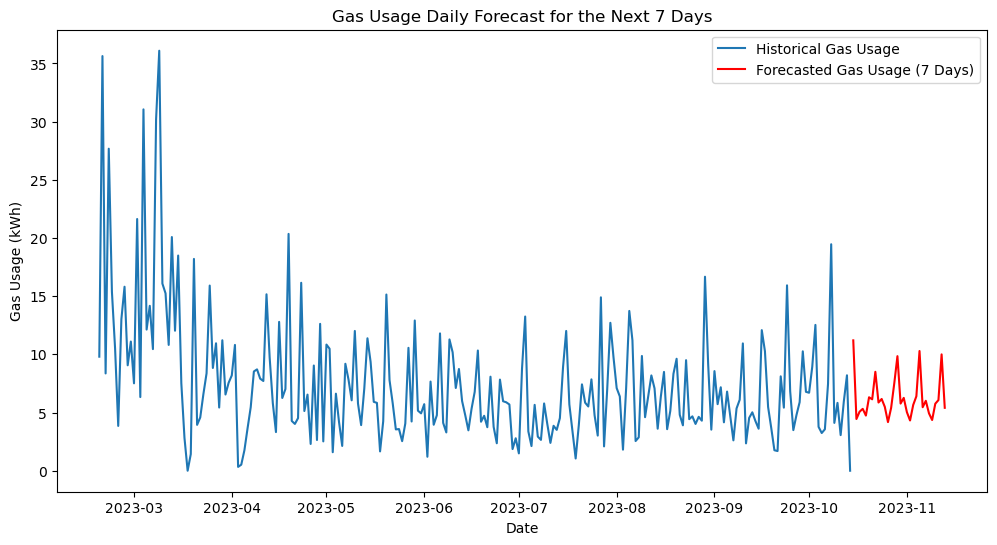

2023-10-15    11.201604
2023-10-16     4.442357
2023-10-17     5.073246
2023-10-18     5.317835
2023-10-19     4.739375
Freq: D, Name: predicted_mean, dtype: float64

In [79]:
# Forecasting gas usage for the next 7 days using the SARIMA(2,1,1)(2,1,1)[7] model
# Applying the same approach as with electricity usage

# Fitting the SARIMA model to the gas usage data
model_sarima_gas = SARIMAX(data['Gas (kWh)'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 7))
fitted_model_sarima_gas = model_sarima_gas.fit()

# Generating the forecast for gas usage for the next 7 days
future_forecast_gas = fitted_model_sarima_gas.forecast(steps=future_forecast_period_7_days)

# Creating a time series for the gas usage forecasted period
future_forecast_series_gas = pd.Series(future_forecast_gas, index=future_dates_7_days)

# Plotting the historical data along with the gas usage forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Gas (kWh)'], label='Historical Gas Usage')
plt.plot(future_forecast_series_gas, label='Forecasted Gas Usage (7 Days)', color='red')
plt.title('Gas Usage Daily Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Gas Usage (kWh)')
plt.legend()
plt.show()

future_forecast_series_gas.head()  # Display the first few forecasted values
